### RNNLM 구현

In [ ]:
import numpy as np
xs = np.array([[1,2,3]])
print(xs.shape)
print(xs[:,0])
print(xs[:,0].shape)
W = np.arange(28).reshape(7,4)
print(W[0])
print(W[[0]])

In [ ]:
a = np.array([1,2,3])
a = a.reshape(-1,1)
print(a)

In [5]:
a = np.array([1,1,1])
print(a)
print(a.shape)
a = a[:, np.newaxis] # 축 추가하는 문법 (차원확장)
print(a)
print(a.shape)

[1 1 1]
(3,)
[[1]
 [1]
 [1]]
(3, 1)


In [ ]:
a = np.array([1,2,3])
a = a[:, np.newaxis]
print(a)

In [ ]:
a = np.array([1,2,3])
a = a[np.newaxis, :]
print(a)

In [ ]:
a = np.array([[1,2],
              [3,4]])
# b = 3
# b = np.array([2,2])
b = np.array([[2],[2]])
a+b   # (2,2) + (2,1) => (2,2) + (2,2)

In [10]:
import numpy as np
dx = np.arange(21).reshape(3,7)
mask = np.ones((3,))
print(mask)
print(mask.shape)
print(mask.reshape(3,1).shape) # (3, 1)
print(mask[:, np.newaxis].shape) # (3, 1)

dx * mask[:, np.newaxis] # (3,7)*(3,1) => (3,7)*(3,7)

''' newaxis사용 이유: 2차원과 1차원을 브로드케스트 하면 원래 1차원이 2차원으로 늘어나는데, 2
아래처럼 한 원소(단어)를 0으로 바꾸면 (즉, 그 단어는 무시하겠단 뜻) 행렬곱 했을 때 차원이 늘어나면서
해당 열이 전부 0으로 바뀜. 미분값에서도 0이 되기 때문에 단어를 사용하지 않게 됨.
결국 그냥 그 단어를 무시할 수 있다는 뜻..~
'''
mask[2] = 0
print(mask)
dx * mask[:, np.newaxis]  

[1. 1. 1.]
(3,)
(3, 1)
(3, 1)
[1. 1. 0.]


array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.],
       [ 7.,  8.,  9., 10., 11., 12., 13.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *

D=4
H=3
rnn_Wx = np.arange(D*H).reshape(D,H)
rnn_Wh = np.arange(H*H).reshape(H,H)
rnn_b = np.arange(H)

rnn = RNN(rnn_Wx, rnn_Wh, rnn_b)
print(rnn.params[0])
print(rnn.params[1])
print(rnn.params[2])

In [11]:
a = (1,2)
print(type(a))
b = 1,2 # 튜플 패킹. 묶지 않아도 변수 하나에 넣으면 튜플로 됨
print(type(b))
a,b = (1,2) # 튜플 언패킹
print(type(a)) # int

def foo():
    return 1,2
# 사실은 리턴을 두개 하는 게 아니고 1,2 자체를 튜플 패킹하기 때문에 하나가 되는 것임.

a,b = foo()
print(a,b) # 1 2

def foo(a,b):
    print(a,b)
# foo((1,2)) 이렇게 애초에 튜플로 묶어서 들여보내면 a=(1,2)이 들어가고 b에는 아무것도 안 들어가기 때문에
# 에러가 남. 이걸 방지하고자
foo(*(1,2)) # *을 사용하여 a=1, b=2를 넣으라고 알려주는 것.!!!!!!!!!!! 즉, 명시적인 튜플 언패킹~ 


a = np.arange(3*4).reshape(3,4)
b = np.random.rand(*a.shape) # *: 명시적인 튜플 언패킹 
print(a)
print(b)

<class 'tuple'>
<class 'tuple'>
<class 'int'>
1 2
1 2
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0.38787255 0.78808935 0.54614592 0.09295028]
 [0.52043007 0.93749184 0.85626426 0.95159664]
 [0.98619484 0.52451684 0.09013551 0.8725119 ]]


In [ ]:
class AAA:
    def __init__(self):
        self.x = 10
        y = 20
        print('__init__()', self)
        
    def foo(self):
        print(self.x)
#         print(y)
        
a = AAA()
print(a)
a.foo()

In [1]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

xs = np.random.randn(3,7)
ts = np.array([1,2,3])
ys = softmax(xs)
print(ys)
print(np.sum(ys, axis=1))

print(ys[np.arange(1 * 3), ts])
ls = np.log(ys[np.arange(1 * 3), ts])
print(ls)
loss = -np.sum(ls)
print(loss)
loss /= 3
print(loss)

[[0.19204427 0.06374374 0.10120973 0.44317755 0.11048209 0.0599139
  0.02942871]
 [0.15888978 0.38605988 0.05684352 0.10051756 0.09832719 0.14230844
  0.05705362]
 [0.06391982 0.12290762 0.38174714 0.12952631 0.08933944 0.11079889
  0.10176078]]
[1. 1. 1.]
[0.06374374 0.05684352 0.12952631]
[-2.75288426 -2.86745302 -2.04387124]
7.664208512542288
2.554736170847429


In [2]:
mask = np.array([1,1,1])
print(mask)
print(mask.shape)
print(mask.reshape(-1,1).shape) # 아래랑 같은 코드
print(mask[:, np.newaxis].shape) # 위랑 같은 코드. 축을 추가하여 세로로 세우는 코드
print(mask[:, np.newaxis])

[1 1 1]
(3,)
(3, 1)
(3, 1)
[[1]
 [1]
 [1]]


In [ ]:
dx = np.arange(21).reshape(3,7)
print(dx)
mask = np.array([0,1,0])
dx *= mask[:, np.newaxis] # 마스크가 다 1이면 그 값들이 다 살아있는데, 단어가 중요하지 않아서 마스크에 0을 넣으면 해당 단어는 다 0이 되어 빠지게 되는 개념
# 즉, 희소단어 계산하기 싫을 때 사용하면 됨.
print(dx)

In [3]:
for i in reversed(range(3)): 
    print(i)

2
1
0


In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *


class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f') 
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f') # 루트(히든층의 뉴런 수)로 나눔 : 사비에르 초기화.
        # 시그모이드나 하이퍼블릭 탄젠트는 자기 뉴런의 은닉층의 루트로 나눔. 
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1): # dout=1: 자기자신의 미분은 1이므로 1부터 시작
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.rnn_layer.reset_state()

### RNNLM의 학습 코드

In [5]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm

corpus, word_to_id, id_to_word = ptb.load_data('train')
print(corpus.shape)
print(corpus[:100])
print(type(word_to_id))
print(len(word_to_id))
print(id_to_word[26])

for i in range(100): # 100개 디코드
    print(id_to_word[corpus[i]], end=' ')
print() # 숫자는 숫자 그대로 넣으면 딥러닝은 따로따로 학습시키기 때문에 숫자를 N으로 했음
# <unk>: 희소단어, <eos> : 문장 끝 의미. 

print(word_to_id['centrust'])

vocab_size = int(max(corpus) + 1)
print('말뭉치 크기: %d, 어휘 수: %d' % (len(corpus), vocab_size))
print(len(word_to_id))

(929589,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 27 24 39 26 40 41 42 26 43
 32 44 45 46 24 47 26 27 28 29 48 49 41 42 50 51 52 53 54 55 35 36 37 42
 56 57 58 59 24 35 60 42 61 62 63 64 65 66 67 68 69 70 35 71 72 42 73 74
 75 35 46 42]
<class 'dict'>
10000
<unk>
aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter <eos> pierre <unk> N years old will join the board as a nonexecutive director nov. N <eos> mr. <unk> is chairman of <unk> n.v. the dutch publishing group <eos> rudolph <unk> N years old and former chairman of consolidated gold fields plc was named a nonexecutive director of this british industrial conglomerate <eos> a form of asbestos once used to make kent cigarette filters has caused a high percentage of cancer deaths among a group of 
4
말뭉치 크기: 929589, 어휘 수: 10000
10000


| 에폭 1 | 퍼플렉서티 394.39
| 에폭 2 | 퍼플렉서티 268.10
| 에폭 3 | 퍼플렉서티 223.94
| 에폭 4 | 퍼플렉서티 214.95
| 에폭 5 | 퍼플렉서티 205.75
| 에폭 6 | 퍼플렉서티 202.72
| 에폭 7 | 퍼플렉서티 197.98
| 에폭 8 | 퍼플렉서티 195.70
| 에폭 9 | 퍼플렉서티 191.04
| 에폭 10 | 퍼플렉서티 192.80
| 에폭 11 | 퍼플렉서티 188.54
| 에폭 12 | 퍼플렉서티 191.70
| 에폭 13 | 퍼플렉서티 189.26
| 에폭 14 | 퍼플렉서티 190.11
| 에폭 15 | 퍼플렉서티 189.44
| 에폭 16 | 퍼플렉서티 185.35
| 에폭 17 | 퍼플렉서티 183.70
| 에폭 18 | 퍼플렉서티 180.10
| 에폭 19 | 퍼플렉서티 181.45
| 에폭 20 | 퍼플렉서티 181.99
| 에폭 21 | 퍼플렉서티 179.81
| 에폭 22 | 퍼플렉서티 175.23
| 에폭 23 | 퍼플렉서티 173.20
| 에폭 24 | 퍼플렉서티 174.29
| 에폭 25 | 퍼플렉서티 171.78
| 에폭 26 | 퍼플렉서티 172.58
| 에폭 27 | 퍼플렉서티 166.38
| 에폭 28 | 퍼플렉서티 164.72
| 에폭 29 | 퍼플렉서티 160.75
| 에폭 30 | 퍼플렉서티 153.74
| 에폭 31 | 퍼플렉서티 154.12
| 에폭 32 | 퍼플렉서티 150.73
| 에폭 33 | 퍼플렉서티 149.15
| 에폭 34 | 퍼플렉서티 143.21
| 에폭 35 | 퍼플렉서티 143.59
| 에폭 36 | 퍼플렉서티 135.68
| 에폭 37 | 퍼플렉서티 131.95
| 에폭 38 | 퍼플렉서티 128.10
| 에폭 39 | 퍼플렉서티 120.97
| 에폭 40 | 퍼플렉서티 118.73
| 에폭 41 | 퍼플렉서티 116.58
| 에폭 42 | 퍼플렉서티 111.91
| 에폭 43 | 퍼플렉서티 104.71
| 에폭 44 | 퍼플렉서티 99.8

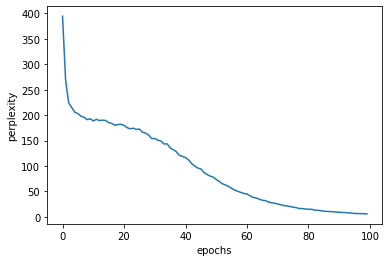

In [6]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm


# 1. (N,T) 로 입력
# 2. (N,T) => (N,T,D)  임베딩층 통과 시
# 3. (N,H)(H,H)+(N,D)(D,H)+(H,) => (N,H) => (N,T,H)  RNN 층 통과 시

# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
# print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
# print(vocab_size)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
# print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward() # 포워드가 끝나면 즉각 백워드가 시작됨!
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 에폭마다 퍼플렉서티 평가 => 로스를 증폭해서 보는 기술! 
    # 결과를 보면 loss가 줄어들고 있는 것을 알 수 있는데 퍼플렉서티가 1에 가깝도록 학습되어야 함
    # 지금은 코퍼스가 1000개라 그렇게까진 안 됨 -> 10000개로 늘려볼 것~
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()


In [7]:
model.layers[0].W[1]

array([ 0.02372971, -0.01304095,  0.02449961, -0.00206318, -0.01231516,
       -0.02456621, -0.0409753 ,  0.01218019, -0.02828816, -0.00175064,
       -0.02990505,  0.0142011 , -0.03970867, -0.0367524 , -0.02216768,
       -0.00409162, -0.01532013,  0.01504941, -0.02428817,  0.04278439,
       -0.02537756, -0.00063911,  0.03523976,  0.01742248, -0.03774654,
       -0.00099697, -0.00906595, -0.02439729, -0.01915917,  0.04038125,
        0.03891945, -0.01074882, -0.02609988,  0.03794376, -0.01179354,
       -0.01906868,  0.0280846 ,  0.05463143,  0.0539816 ,  0.01158238,
       -0.02373425,  0.00570924, -0.0111488 , -0.00818964, -0.02604602,
       -0.02251796, -0.04193489,  0.00073208,  0.01330736,  0.0288386 ,
       -0.02325837,  0.02729252, -0.02796168, -0.0762394 ,  0.00983488,
       -0.00893506,  0.03504473, -0.02444181, -0.03869294,  0.01463275,
       -0.01571368, -0.03472419,  0.02093372,  0.01275448,  0.02385257,
        0.00192369,  0.00989669, -0.01356172, -0.01105005, -0.00

### RNNLM의 Trainer 클래스

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 420.05
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 358.61
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 255.46
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 221.51
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 209.72
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 207.40
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 199.59
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 199.84
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 195.02
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 190.62
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 193.19
| 에폭 12 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 189.67
| 에폭 13 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 192.60
| 에폭 14 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 187.56
| 에폭 15 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 186.67
| 에폭 16 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 190.93
| 에폭 17 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 189.05
| 에폭 18 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 184.29
| 에폭 19 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 180.97
| 에폭 20 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 180.99
| 에폭 21 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 179.29
| 에폭 22 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 178.

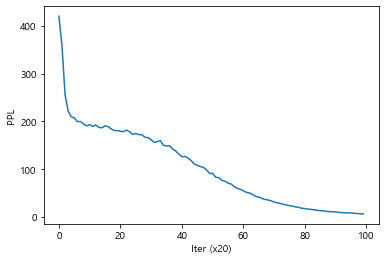

In [8]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb
from simple_rnnlm import SimpleRnnlm
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()


In [12]:
import numpy as np

out = np.zeros((2,3,4))
embed_W = np.arange(28).reshape(7,4)
print(embed_W)
idx = [0,3]
out[:,0,:] = embed_W[idx]
print(out) #  embed_W에서 0행과 3행을 추출하는데 shape확인할 것
idx = [1,4]
out[:,1,:] = embed_W[idx]
print(out)
idx = [2,1]
out[:,2,:] = embed_W[idx]

out



[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]]
[[[ 0.  1.  2.  3.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[12. 13. 14. 15.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]]
[[[ 0.  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 0.  0.  0.  0.]]

 [[12. 13. 14. 15.]
  [16. 17. 18. 19.]
  [ 0.  0.  0.  0.]]]


array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]],

       [[12., 13., 14., 15.],
        [16., 17., 18., 19.],
        [ 4.,  5.,  6.,  7.]]])

In [13]:
import numpy as np

xs = np.arange(18).reshape(2,3,3)
print(xs)
rx  = xs.reshape(2*3,-1)
print(rx)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]]
